In [ ]:
#!pip install mtcnn
import cv2
from mtcnn import MTCNN

detector = MTCNN()



In [18]:
image = cv2.cvtColor(cv2.imread("sample_data/a.jpg"), cv2.COLOR_BGR2RGB)
result = detector.detect_faces(image)

In [19]:
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

In [ ]:
cv2.rectangle(image,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)

In [ ]:
cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

In [22]:
cv2.imwrite("ivan_drawn.jpg", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

print(result)

[{'box': [256, 79, 115, 158], 'confidence': 0.9999649524688721, 'keypoints': {'left_eye': (286, 143), 'right_eye': (341, 143), 'nose': (312, 173), 'mouth_left': (289, 199), 'mouth_right': (338, 199)}}]


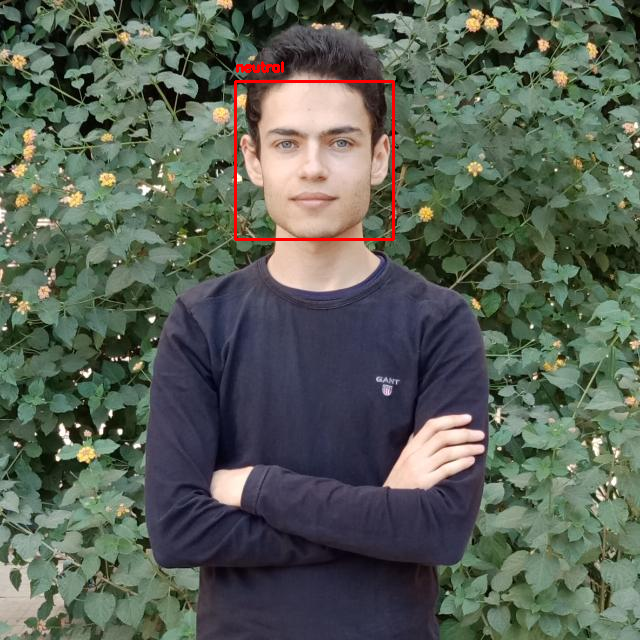

In [14]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import imutils
import cv2
import numpy as np
import sys
from google.colab.patches import cv2_imshow

# parameters for loading data and images
detection_model_path = 'sample_data/haarcascade_frontalface_default.xml'
emotion_model_path = 'sample_data/_mini_XCEPTION.106-0.65.hdf5'
img_path = 'sample_data/a.jpg'

# hyper-parameters for bounding boxes shape
# loading models
face_detection = cv2.CascadeClassifier(detection_model_path)

emotion_classifier = load_model(emotion_model_path, compile=False)
#emotion_classifier.summary()
EMOTIONS = ["angry","disgust","scared", "happy", "sad", "surprised","neutral"]


#reading the frame
orig_frame = cv2.imread(img_path) 
#print(orig_frame.shape)
frame = cv2.imread(img_path,0)
faces = face_detection.detectMultiScale(frame,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)

if len(faces) > 0:
    
    for i in range(len(faces)):
        faces2 = sorted(faces, reverse=True,key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[i]
        (fX, fY, fW, fH) = faces2
        roi = frame[fY:fY + fH, fX:fX + fW]
        roi = cv2.resize(roi, (48, 48))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        preds = emotion_classifier.predict(roi)[0]
        #print(preds)
        emotion_probability = np.max(preds)
        label = EMOTIONS[preds.argmax()]
        cv2.putText(orig_frame, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
        cv2.rectangle(orig_frame, (fX, fY), (fX + fW, fY + fH),(0, 0, 255), 2)
#print(orig_frame)    
cv2_imshow( orig_frame)
#cv2.imwrite('test_output/'+img_path.split('/')[-1],orig_frame)
#if (cv2.waitKey(2000) & 0xFF == ord('q')):
#    sys.exit("Thanks")
#cv2.destroyAllWindows()

In [ ]:
from keras.preprocessing.image import img_to_array
import imutils
import cv2
from keras.models import load_model
import numpy as np

# parameters for loading data and images
detection_model_path = 'sampe_data/haarcascade_frontalface_default.xml'
emotion_model_path = 'sample_data/_mini_XCEPTION.106-0.65.hdf5'

# hyper-parameters for bounding boxes shape
# loading models
face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["angry" ,"disgust","scared", "happy", "sad", "surprised",
 "neutral"]


# starting video streaming
cv2.namedWindow('your_face')
camera = cv2.VideoCapture(0)
while True:
    frame = camera.read()[1]
    #reading the frame
    frame = imutils.resize(frame,width=400)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detection.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)
    
    canvas = np.zeros((250, 300, 3), dtype="uint8")
    frameClone = frame.copy()
    if len(faces) > 0:
        faces = sorted(faces, reverse=True,
        key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
        (fX, fY, fW, fH) = faces
                    # Extract the ROI of the face from the grayscale image, resize it to a fixed 48x48 pixels, and then prepare
            # the ROI for classification via the CNN
        roi = gray[fY:fY + fH, fX:fX + fW]
        roi = cv2.resize(roi, (48, 48))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        
        
        preds = emotion_classifier.predict(roi)[0]
        emotion_probability = np.max(preds)
        label = EMOTIONS[preds.argmax()]

 
    for (i, (emotion, prob)) in enumerate(zip(EMOTIONS, preds)):
                # construct the label text
                text = "{}: {:.2f}%".format(emotion, prob * 100)
                w = int(prob * 300)
                cv2.rectangle(canvas, (7, (i * 35) + 5),
                (w, (i * 35) + 35), (0, 0, 255), -1)
                cv2.putText(canvas, text, (10, (i * 35) + 23),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45,
                (255, 255, 255), 2)
                cv2.putText(frameClone, label, (fX, fY - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
                cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH),
                              (0, 0, 255), 2)

    cv2.imshow('your_face', frameClone)
    cv2.imshow("Probabilities", canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

Using TensorFlow backend.
